<a href="https://colab.research.google.com/github/amandahaff/MAT422/blob/main/3_3_HW_Haffner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.3 Unconstrained Optimiztion**

Derive optimality conditions for unconstrained continuous optimization problems and start with local minimizers

3.3.1. Necessary and sufficient conditions of local minimizers

In [1]:
import matplotlib.pyplot as plt
import numpy.linalg as npl
import numpy as np
from scipy.signal import argrelextrema
import sympy as sym

x = np.arange(-5, 5, 0.1)
def f(x):
    return x**4 - 8*x**2 + 4*x + 2

# How to find Global Minumum
from scipy import optimize
grid = (-5, 5, 0.1)
xmin_global = optimize.brute(f, (grid, ))
print("Global minima found %s" % xmin_global)

# How to find Local Minumum
# Find the 1st Derivative
import sympy as sym
x = sym.symbols('x')
first = sym.diff(x**4 - 8*x**2 + 4*x + 2, x)
print('1st derivative: ', first)

# Find the Roots of the 1st Derivative
# Type Coefficients
p = [4, 0, -16, 4]
roots = np.roots(p)
print('Roots of 1st Derivative', roots)

# Restrict the domain
xmin_local = optimize.fminbound(f, 0, 5)
print("Local minimum found %s" % xmin_local)


Global minima found [-2.11491943]
1st derivative:  4*x**3 - 16*x + 4
Roots of 1st Derivative [-2.11490754  1.86080585  0.25410169]
Local minimum found 1.8608054464313526


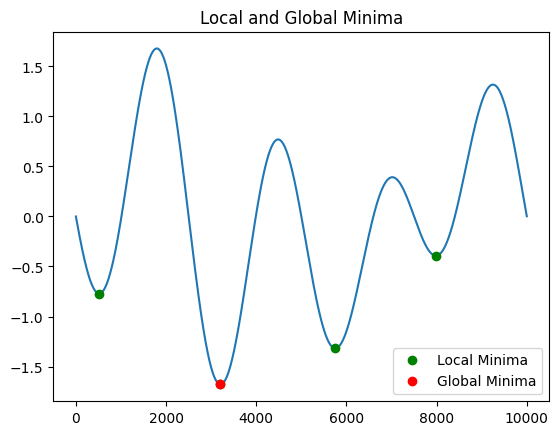

In [2]:
X = np.arange(0, 1, 0.0001)
f_x = np.sin(2*np.pi*X) * np.sin(4*np.pi*X) - np.sin(8*np.pi*X)
X = np.arange(0, len(X), 1)
# Find global minima
min_x = X[np.argmin(f_x)]
min_y = np.min(f_x)

# Find the local minima
local_min_x = X[argrelextrema(f_x, np.less)[0]]
local_min_y = f_x[argrelextrema(f_x, np.less)[0]]
plt.figure()
plt.title("Local and Global Minima")

# Plot the function
plt.plot(X, f_x)

# Plot the local minima
plt.plot(local_min_x, local_min_y, 'go', label="Local Minima")

# Plot the global minima
plt.plot(min_x, min_y, 'ro', label="Global Minima")

plt.legend()
plt.show()

3.3.2. Convexity and global minimizers

A real-valued function is called convex if the line segment between any two points on the graph of the function lies above the graph between the two points. Our optimality conditions have only concerned local minimizers. Indeed, in the absence of global structure, local information such as gradients and Hessians can only inform about the immediate neighborhood of points. Here we consider convexity, under which local minimizers are also global
minimizers.


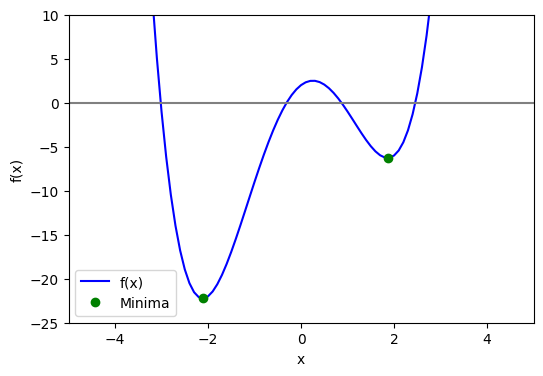

In [3]:
x = np.arange(-5, 5, 0.1)
def f(x):
    return x**4 - 8*x**2 + 4*x + 2


fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot the function
ax.plot(x, f(x), 'b-', label="f(x)")

# How to adjust the y-axis and x-axis
plt.ylim([-25, 10])
plt.xlim([-5, 5])

# Plot the minima
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")

# Decorate the figure
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.axhline(0, color='gray')

1st derivative:  4*x**3 - 16*x + 4
2nd derivative:  4*(3*x**2 - 4)


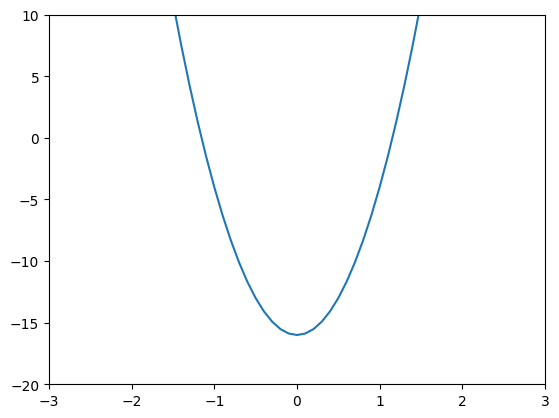

A twice-differentiable function is convex if and only if its 2nd derivative is nonnegative on its entire domain.
This function is not convex, because of it's negative values.


In [4]:
x = np.arange(-5, 5, 0.1)
def f(x):
    return x**4 - 8*x**2 + 4*x + 2


x = sym.symbols('x')
first = sym.diff(x**4 - 8*x**2 + 4*x + 2, x)
print('1st derivative: ', first)

second = sym.diff(x**4 - 8*x**2 + 4*x + 2, x, 2)
print('2nd derivative: ', second)

# Graph the 2nd Derivative
x = np.arange(-3.5, 3.5, 0.1)
y = 4*(3*x**2 - 4)

plt.ylim([-20, 10])
plt.xlim([-3, 3])

plt.plot(x,y)
plt.show()
print("A twice-differentiable function is convex if and only if its 2nd derivative is nonnegative on its entire domain.")
print("This function is not convex, because of it's negative values.")

3.3.3. Gradient descent

Gradient descent is an iterative optimization algorithm for finding a local
minimum of a differentiable function. Once we know a function has a mini-
mizer, we will discuss a class of algorithms known as gradient descent method
for solving optimization problems numerically.

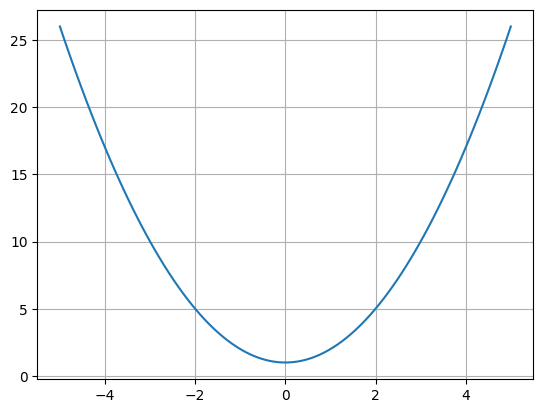

The 0 iteration：x value is  6.0
The 1 iteration：x value is  3.5999999999999996
The 2 iteration：x value is  2.1599999999999997
The 3 iteration：x value is  1.2959999999999998
The 4 iteration：x value is  0.7775999999999998
The 5 iteration：x value is  0.46655999999999986
The 6 iteration：x value is  0.2799359999999999
The 7 iteration：x value is  0.16796159999999993
The 8 iteration：x value is  0.10077695999999996
The 9 iteration：x value is  0.06046617599999997
The 10 iteration：x value is  0.036279705599999976
The 11 iteration：x value is  0.021767823359999987
The 12 iteration：x value is  0.013060694015999992
The 13 iteration：x value is  0.007836416409599995
The 14 iteration：x value is  0.004701849845759997
The 15 iteration：x value is  0.002821109907455998
The 16 iteration：x value is  0.0016926659444735988
The 17 iteration：x value is  0.0010155995666841593
The 18 iteration：x value is  0.0006093597400104956
The 19 iteration：x value is  0.0003656158440062973
The 20 iteration：x value is  0.000219

In [5]:
x = np.linspace(-5,5,100)
y = x ** 2 + 1
plt.grid()
plt.plot(x,y)
plt.show()
def grad_1d(x):
    return x * 2

def gradient_descent_1d(grad, cur_x=0.1, learning_rate=0.01, precision=0.0001, max_iters=10000):
    """
    :param grad:           The gradient of the objective function
    :param cur_x:          The current x value, which can be provided with an initial value as an argument
    :param learning_rate:  The learning rate is also equivalent to the set step size
    :param precision:      Set the convergence precision
    :param max_iters:      maximum number of iterations
    :return:               local minimum x*
    """
    for i in range(max_iters):
        grad_cur = grad(cur_x)
        if abs(grad_cur) < precision:
            break  # When the gradient approaches 0, it is regarded as convergent
        cur_x = cur_x - grad_cur * learning_rate
        print("The", i, "iteration：x value is ", cur_x)
    print(" local minimum  x =", cur_x)
    return cur_x


if __name__ == '__main__':
    gradient_descent_1d(grad_1d, cur_x=10, learning_rate=0.2, precision=0.000001, max_iters=10000)